In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Input, Conv2D, MaxPooling2D,GlobalMaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Activation, MaxPool2D, AvgPool2D, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.applications import DenseNet121, VGG19, ResNet50
from IPython.display import display, Image
import matplotlib.pyplot as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import warnings
warnings.filterwarnings("ignore")

from sklearn.utils import shuffle

In [ ]:
# 1. Loading Datasets

In [32]:
train_df = pd.read_csv('../input/coronahack-chest-xraydataset/Chest_xray_Corona_Metadata.csv')
valid_df = pd.read_csv('../input/coronahack-chest-xraydataset/Chest_xray_Corona_dataset_Summary.csv')

print('The training dataset has rows : ', format(train_df.shape[0]))
print('The training dataset has cols : ', format(train_df.shape[1]))

The training dataset has rows :  5910
The training dataset has cols :  6


In [33]:
train_df.head(5)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [ ]:
# 2. Missing Values

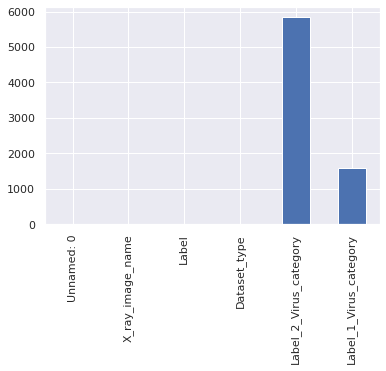

In [34]:
missing_vals = train_df.isnull().sum()
missing_vals.plot(kind = 'bar')

In [35]:
train_df.dropna(how = 'all')
train_df.isnull().sum()

Unnamed: 0                   0
X_ray_image_name             0
Label                        0
Dataset_type                 0
Label_2_Virus_category    5841
Label_1_Virus_category    1576
dtype: int64

In [36]:
train_data = train_df[train_df['Dataset_type'] == 'TRAIN']
test_data = train_df[train_df['Dataset_type'] == 'TEST']
assert train_data.shape[0] + test_data.shape[0] == train_df.shape[0]
print(f"Shape of train data : {train_data.shape}")
print(f"Shape of test data : {test_data.shape}")
test_data.sample(10)

Shape of train data : (5286, 6)
Shape of test data : (624, 6)


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5843,5866,person20_virus_51.jpeg,Pnemonia,TEST,NaN,Virus
5680,5703,person111_bacteria_534.jpeg,Pnemonia,TEST,NaN,bacteria
5774,5797,person78_bacteria_385.jpeg,Pnemonia,TEST,NaN,bacteria
5563,5586,person152_bacteria_720.jpeg,Pnemonia,TEST,NaN,bacteria
5627,5650,person128_bacteria_607.jpeg,Pnemonia,TEST,NaN,bacteria
5741,5764,person87_bacteria_434.jpeg,Pnemonia,TEST,NaN,bacteria
5433,5456,NORMAL2-IM-0249-0001.jpeg,Normal,TEST,NaN,NaN
5540,5563,person1612_virus_2797.jpeg,Pnemonia,TEST,NaN,Virus
5693,5716,person108_bacteria_511.jpeg,Pnemonia,TEST,NaN,bacteria
5585,5608,person141_bacteria_681.jpeg,Pnemonia,TEST,NaN,bacteria


Let's fill the missing values with 'unknown'

In [37]:
train_fill = train_data.fillna('unknown')
test_fill = test_data.fillna('unknown')
display(train_fill.head(5))

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,unknown,unknown
1,1,IM-0127-0001.jpeg,Normal,TRAIN,unknown,unknown
2,2,IM-0125-0001.jpeg,Normal,TRAIN,unknown,unknown
3,3,IM-0122-0001.jpeg,Normal,TRAIN,unknown,unknown
4,4,IM-0119-0001.jpeg,Normal,TRAIN,unknown,unknown


In [ ]:
# 3. Visualization of Unknown Data

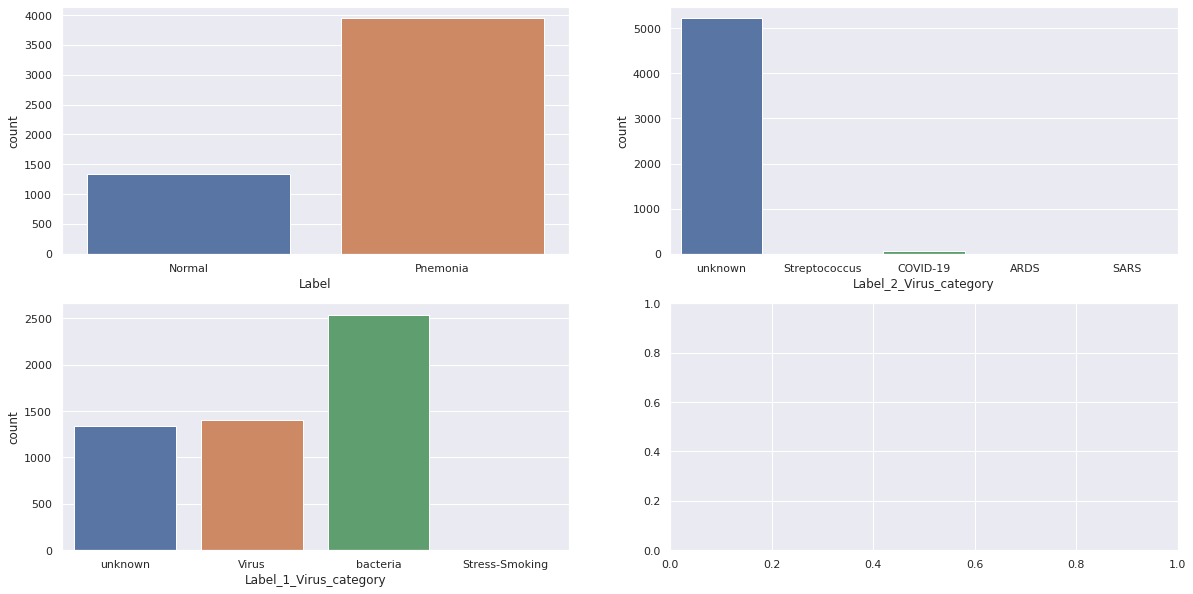

In [38]:
targets = ['Label', 'Label_2_Virus_category', 'Label_1_Virus_category']
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.countplot(x=targets[0], data=train_fill, ax=ax[0, 0])
sns.countplot(x=targets[1], data=train_fill, ax=ax[0, 1])
sns.countplot(x=targets[2], data=train_fill, ax=ax[1, 0])
plt.show()

In [ ]:
# 4. Display Images

In [39]:
test_img_dir = '/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test'
train_img_dir = '/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'

assert os.path.isdir(test_img_dir) == True
assert os.path.isdir(train_img_dir) == True

sample_train_images = list(os.walk(train_img_dir))[0][2][:8]
sample_train_images = list(map(lambda x: os.path.join(train_img_dir, x), sample_train_images))

sample_test_images = list(os.walk(test_img_dir))[0][2][:8]
sample_test_images = list(map(lambda x: os.path.join(test_img_dir, x), sample_test_images))

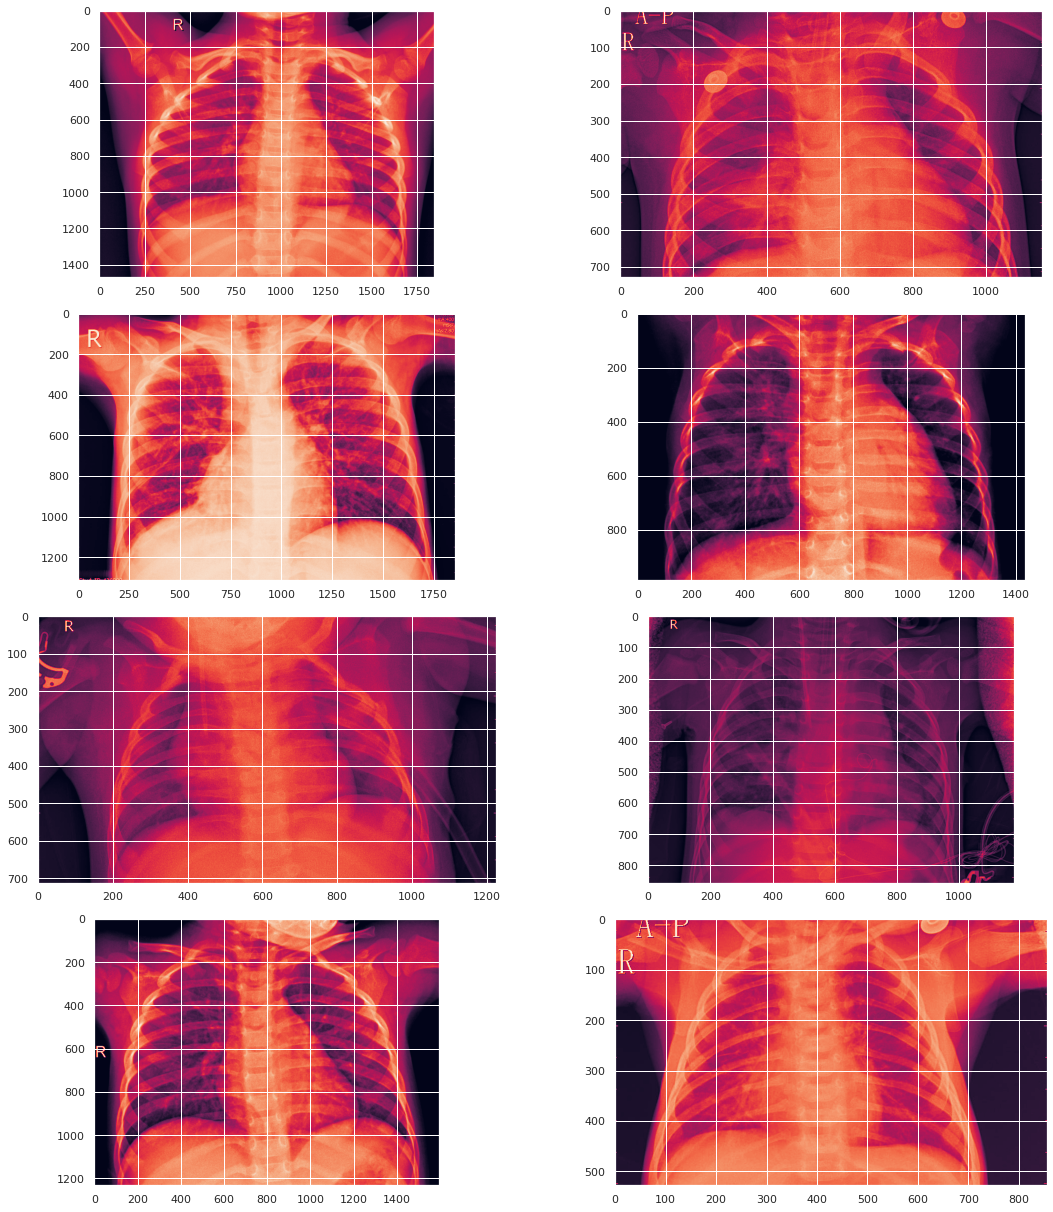

In [40]:
from PIL import Image
plt.figure(figsize = (17,17))
for iterator, filename in enumerate(sample_train_images):
    image = Image.open(filename)
    plt.subplot(4,2,iterator+1)
    plt.imshow(image)

plt.tight_layout()

Displaying test images

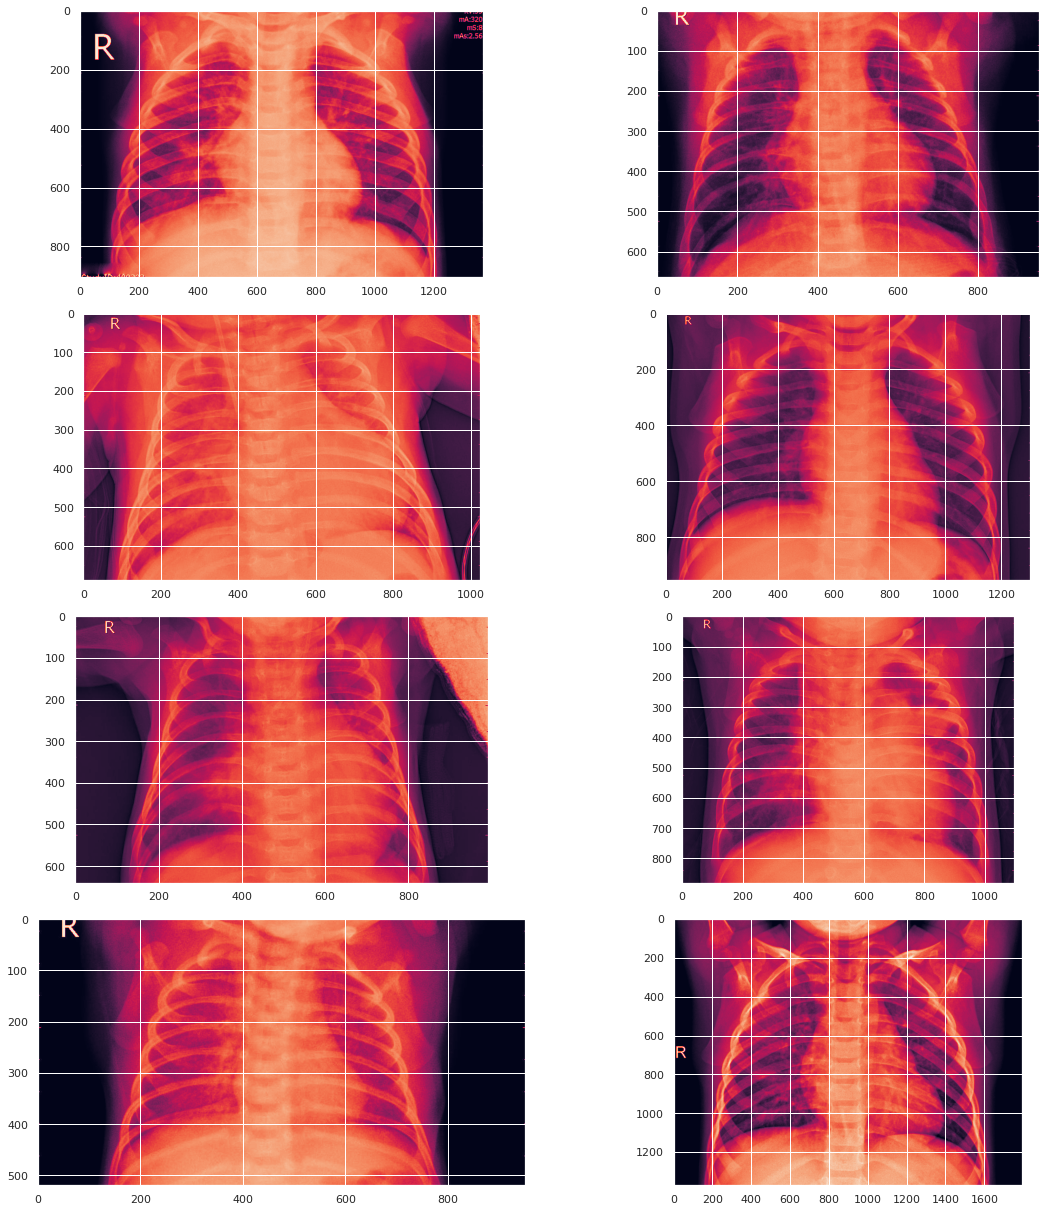

In [41]:
plt.figure(figsize = (17,17))
for iterator, filename in enumerate(sample_test_images):
    image = Image.open(filename)
    plt.subplot(4,2,iterator+1)
    plt.imshow(image)

plt.tight_layout()

In [ ]:
# 4.1 Histogram analysis of Images

In [ ]:
#**For COVID-19 cases**

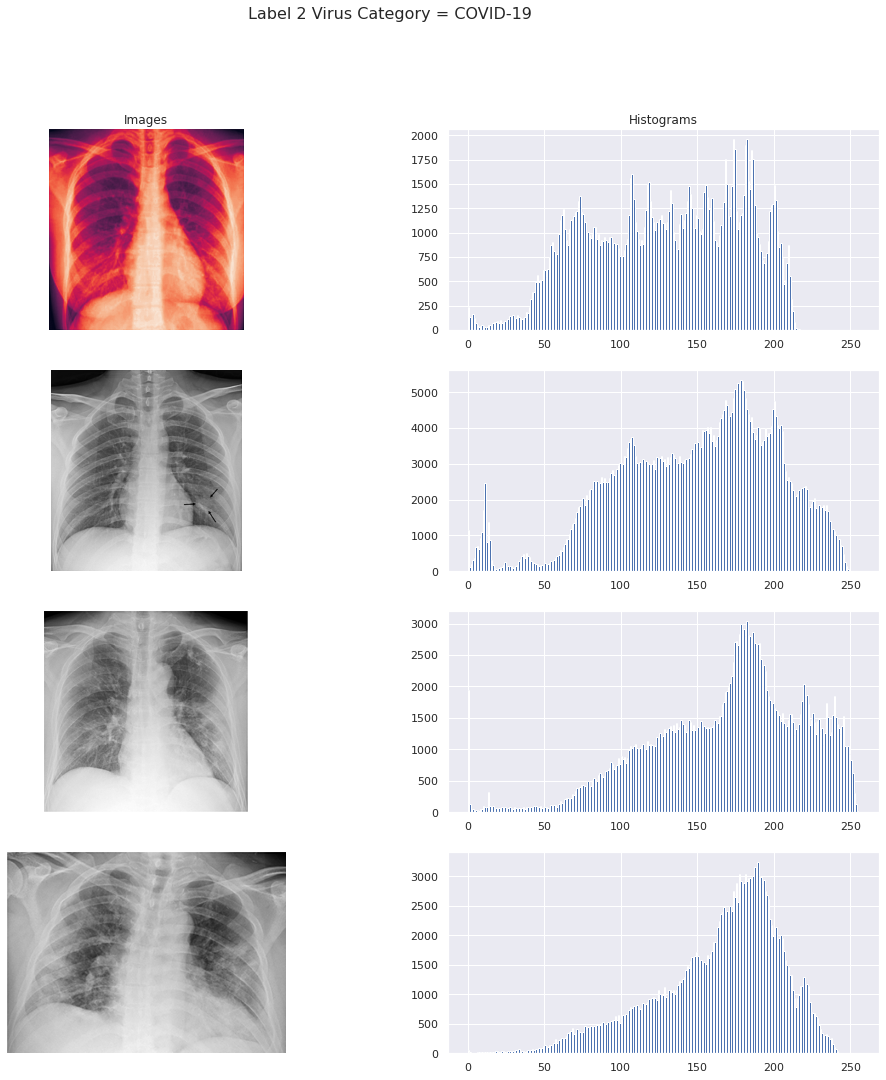

In [42]:
fig, ax = plt.subplots(4, 2, figsize=(17, 17))


covid_path = train_data[train_data['Label_2_Virus_category']=='COVID-19']['X_ray_image_name'].values

sample_covid_path = covid_path[:4]
sample_covid_path = list(map(lambda x: os.path.join(train_img_dir, x), sample_covid_path))

for row, file in enumerate(sample_covid_path):
    image = plt.imread(file)
    ax[row, 0].imshow(image)
    ax[row, 1].hist(image.ravel(), 256, [0,256])
    ax[row, 0].axis('off')
    if row == 0:
        ax[row, 0].set_title('Images')
        ax[row, 1].set_title('Histograms')
fig.suptitle('Label 2 Virus Category = COVID-19', size=16)
plt.show()

**Normal Histogram images**

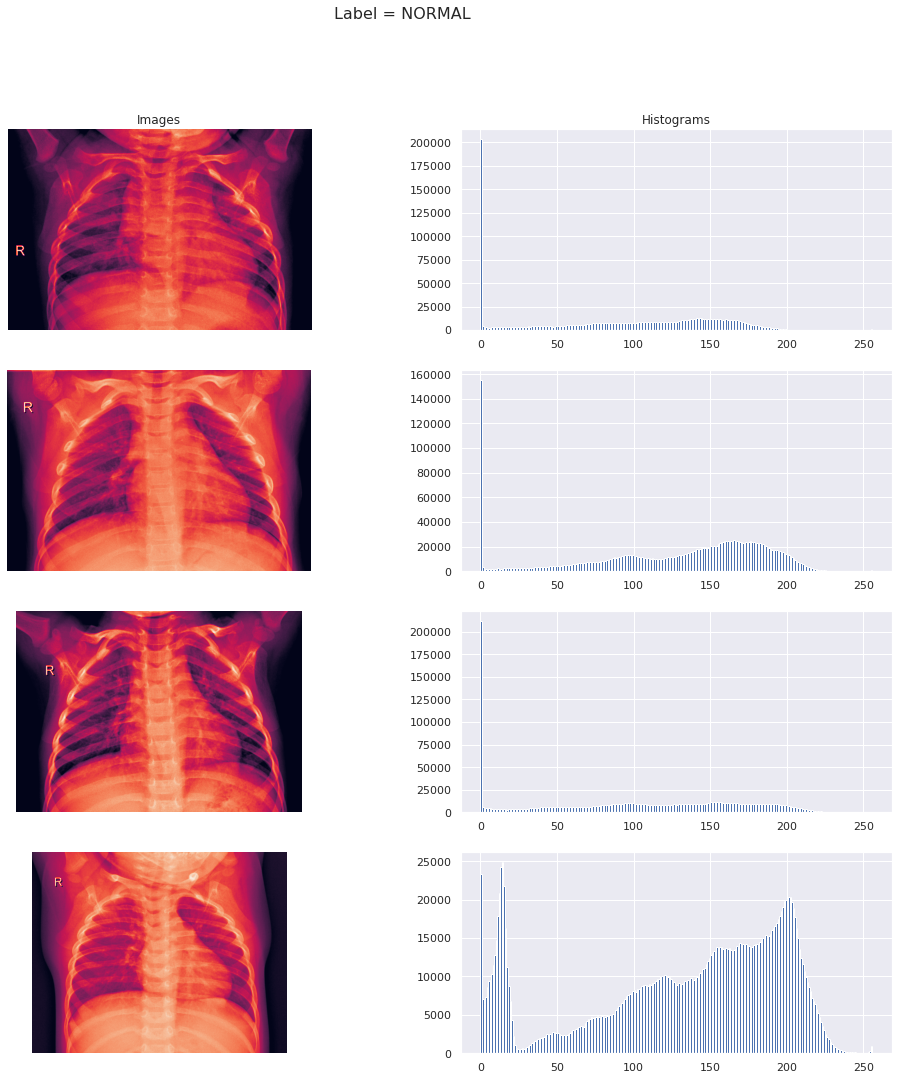

In [43]:
fig, ax = plt.subplots(4, 2, figsize=(17, 17))


normal_path = train_data[train_data['Label']=='Normal']['X_ray_image_name'].values

sample_normal_path = normal_path[:4]
sample_normal_path = list(map(lambda x: os.path.join(train_img_dir, x), sample_normal_path))

for row, file in enumerate(sample_normal_path):
    image = plt.imread(file)
    ax[row, 0].imshow(image)
    ax[row, 1].hist(image.ravel(), 256, [0,256])
    ax[row, 0].axis('off')
    if row == 0:
        ax[row, 0].set_title('Images')
        ax[row, 1].set_title('Histograms')
fig.suptitle('Label = NORMAL', size=16)
plt.show()

In [ ]:
# 5. Image Augmentation

In [44]:
final_train_data = train_data[(train_data['Label'] == 'Normal') | 
                              ((train_data['Label'] == 'Pnemonia') & (train_data['Label_2_Virus_category'] == 'COVID-19'))]


# Create a target attribute where value = positive if 'Pnemonia + COVID-19' or value = negative if 'Normal'
final_train_data['target'] = ['negative' if holder == 'Normal' else 'positive' for holder in final_train_data['Label']]

final_train_data = shuffle(final_train_data, random_state=1)

final_validation_data = final_train_data.iloc[1000:, :]
final_train_data = final_train_data.iloc[:1000, :]

print(f"Final train data shape : {final_train_data.shape}")
final_train_data.sample(10)

Final train data shape : (1000, 7)


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category,target
988,988,NORMAL2-IM-0981-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
1109,1109,NORMAL2-IM-1054-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
121,121,IM-0312-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
1118,1118,NORMAL2-IM-1131-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
622,622,NORMAL2-IM-0437-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
538,538,IM-0674-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
600,600,NORMAL2-IM-0386-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
5258,5272,5CBC2E94-D358-401E-8928-965CCD965C5C.jpeg,Pnemonia,TRAIN,COVID-19,Virus,positive
51,51,IM-0225-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
437,437,IM-0595-0001.jpeg,Normal,TRAIN,NaN,NaN,negative


In [45]:
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=0.5,
)

test_image_generator = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_image_generator.flow_from_dataframe(
    dataframe=final_train_data,
    directory=train_img_dir,
    x_col='X_ray_image_name',
    y_col='target',
    target_size=(224, 224),
    batch_size=16,
    seed=2020,
    shuffle=True,
    class_mode='binary'
)

validation_generator = train_image_generator.flow_from_dataframe(
    dataframe=final_validation_data,
    directory=train_img_dir,
    x_col='X_ray_image_name',
    y_col='target',
    target_size=(224, 224),
    batch_size=16,
    seed=2020,
    shuffle=True,
    class_mode='binary'
)

test_generator = test_image_generator.flow_from_dataframe(
    dataframe=test_data,
    directory=test_img_dir,
    x_col='X_ray_image_name',
    target_size=(224, 224),
    shuffle=False,
    batch_size=16,
    class_mode=None)

Found 1000 validated image filenames belonging to 2 classes.
Found 400 validated image filenames belonging to 2 classes.
Found 624 validated image filenames.


In [ ]:
# 6. Model Development

In [46]:
IMG_W = 224
IMG_H = 224
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 30
BATCH_SIZE = 6

In [ ]:
# 6.1 Convolutional Neural Network

In [47]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
activation_8 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_9 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 52, 52, 64)       

In [49]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.9325):
            print("\nReached 94.25% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()

In [50]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit_generator(train_generator,
                   validation_data=validation_generator,
                   epochs=15)

Train for 63 steps, validate for 25 steps
Epoch 1/15
63/63 [==============================] - 84s 1s/step - loss: 0.6692 - accuracy: 0.9600 - val_loss: 0.2246 - val_accuracy: 0.9425
Epoch 2/15
63/63 [==============================] - 84s 1s/step - loss: 0.1569 - accuracy: 0.9650 - val_loss: 0.4541 - val_accuracy: 0.9425
Epoch 3/15
63/63 [==============================] - 84s 1s/step - loss: 0.1484 - accuracy: 0.9650 - val_loss: 0.2155 - val_accuracy: 0.9425
Epoch 4/15
63/63 [==============================] - 84s 1s/step - loss: 0.1539 - accuracy: 0.9650 - val_loss: 0.2047 - val_accuracy: 0.9425
Epoch 5/15
63/63 [==============================] - 85s 1s/step - loss: 0.1508 - accuracy: 0.9650 - val_loss: 0.1947 - val_accuracy: 0.9425
Epoch 6/15
63/63 [==============================] - 86s 1s/step - loss: 0.1564 - accuracy: 0.9650 - val_loss: 0.2021 - val_accuracy: 0.9425
Epoch 7/15
63/63 [==============================] - 85s 1s/step - loss: 0.1497 - accuracy: 0.9650 - val_loss: 0.2001 -

In [ ]:
#**Plots to estimate loss and accuracy**

In [52]:
print("Accuracy on training set : ", history.history['accuracy'][-1])
print("Accuracy on Validation set : ", history.history['val_accuracy'][-1])

Accuracy on training set :  0.965
Accuracy on Validation set :  0.9425


In [59]:
y_hat = model.predict(validation_generator)
y = np.array(y_hat)
y[0:3]

array([[0.03618196],
       [0.03531868],
       [0.03560153]], dtype=float32)